<a href="https://colab.research.google.com/github/victorm0202/OP-2020-code/blob/master/3)_Taller_Keras_(Sequence_Eg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 01 - Taller Keras NN's
Estructura de los modelos en keras, capas.

Sequential es el modelo más simple, consiste en una pila de capas

Arquitecturas más complejas API Keras

In [ ]:
import tensorflow as tf 

In [ ]:
!nvidia-smi 

Sun Aug 16 22:56:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    29W /  70W |    227MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

## Modelo Secuencial
Declara modelo secuencial

In [ ]:
from keras.models import Sequential

model = Sequential()

apilar capas al modelo con ".add()"


In [ ]:
from tf.keras.layers import Dense

model.add(Dense(units = 64, activation = "relu", input_dim = 100))
model.add(Dense(units= 10, activation ="softmax"))

input_shape -> argumento a la primera capa. ( la dimensión del lote no está incluida.)

## Selección parámetros de entrenamiento:

* optimizer: método de optimización

* loss (función de pérdida): Función abjetivo a minimizar

* metrics: lista de métricas a monitorear durante el proceso de entrenamient

In [ ]:
model.compile(loss = "categorical_crossentropy", # función de costo
             optimizer = "sgd",                  # método de optimización
             metrics = ["accuracy"])             # metrica de monitoreo


se puede configurar el compilador, seleccionar el algoritmo de optimización

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, 
                                             momentum=0.9, 
                                             nesterov=True))


Función de perdida:

* mean_squared_error

* mean_absolute_error

* mean_absolute_percentage_error

* mean_squared_logarithmic_error

* squared_hinge

* hinge

* categorical_hinge

* logcosh

* categorical_crossentropy

* sparse_categorical_crossentropy

* binary_crossentropy

* kullback_leibler_divergence

* poisson

* cosine_proximity

ver : https://keras.io/losses/

Optimizador:

* SGD

* RMSprop

* Adagrad

* Adadelta

* Adam

* Adamax

* Nadam

ver : https://keras.io/optimizers/

ver: http://ruder.io/optimizing-gradient-descent/index.html#fn:6

Entrenamiento
Ahora puede iterar sobre sus datos de entrenamiento en lotes



In [ ]:
model.fit(x_train, y_train, epoch = 5, batch_size = 32)

Otros parámetros:

* validation_split

* validation_data

* shuffle

* class_weight

* sample_weight

* initial_epoch

* steps_per_epoch

* validation_steps

* verbose

* callbacks: Lista de funciones callback a invocarse durante el entrenamiento para monitorear estados internos del modelo durante el entrenamiento

ver: https://keras.io/models/sequential/

Epoca: una epoca es cuando todo el conjunto de datos se pasa hacia adelante y hacia atrás a través de la red neuronal solo UNA VEZ

Batch Size: Número total de ejemplos de entrenamientos en un solo lote

Iteración: es el número de lotes necesarios para completar una epoca

Ejemplo: suponga que tenemos 2000 datos de entrenamiento. Podemos dividir el conjunto de datos en lotes de 500, entonces nos toma 4 iteraciones parta completar una epoca.

Se puede entrenar por lotes de manera manual

In [ ]:
model.train_on_batch(x_batch, y_batch)

evalua el desempeño

In [ ]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

Otras metricas:

Precisión -> precision_score(y_pred_label, y_test_label, average='macro')

Recall -> recall_score(y_pred_label, y_test_label, average='macro')

F1-score -> f1_score(y_pred_label, y_test_label, average='macro') ->

Coeficiente kappa de Cohen -> cohen_kappa_score(y_pred_label, y_test_label)

genera predicción sobre datos de prueba

In [ ]:
classes = model.predict(x_test, batch_size=128)

## Ejemplo

### Red Neuronal

In [ ]:
# Se importa MNIST 

In [ ]:
import tensorflow 

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Datos de entrenamiento:", train_images.shape)
print("Etiquetas datos de entrenamiento:", len(train_labels))

print("Datos de prueba:", test_images.shape)
print("Etiquetas datos de prueba:", len(test_labels))

Datos de entrenamiento: (60000, 28, 28)
Etiquetas datos de entrenamiento: 60000
Datos de prueba: (10000, 28, 28)
Etiquetas datos de prueba: 10000


In [ ]:
#  Pre- proceso
train_images.reshape((60000, 28 * 28)).shape

(60000, 784)

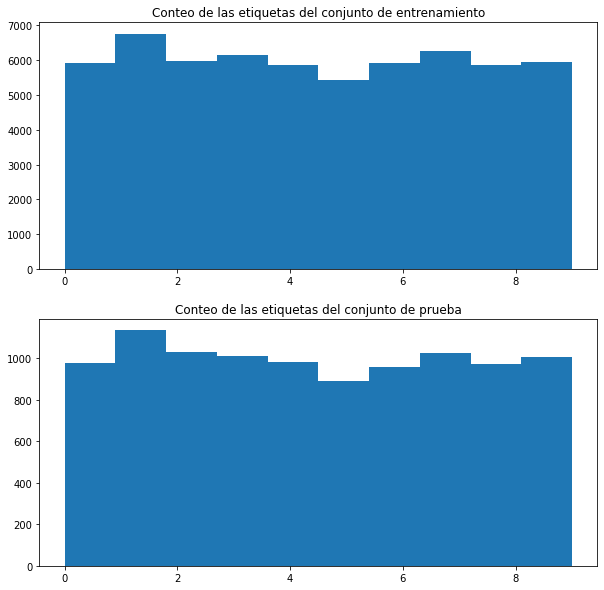

In [ ]:
# Estructura de la muestra (balanceado)


import  matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.hist(train_labels[:], bins=10)
plt. title('Conteo de las etiquetas del conjunto de entrenamiento')
plt.subplot(212)
plt.hist(test_labels[:], bins=10)
plt. title('Conteo de las etiquetas del conjunto de prueba')
plt.show()

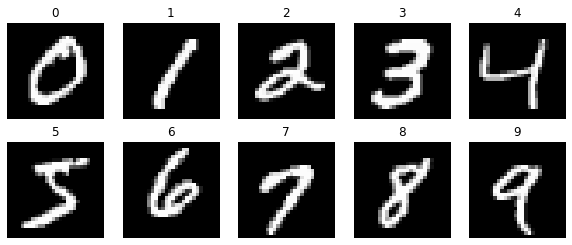

In [ ]:
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    idx = list(train_labels).index(i)
    plt.imshow(train_images[idx], 'gray')
    plt.title(train_labels[idx])
    plt.axis('off')
    
plt.show()

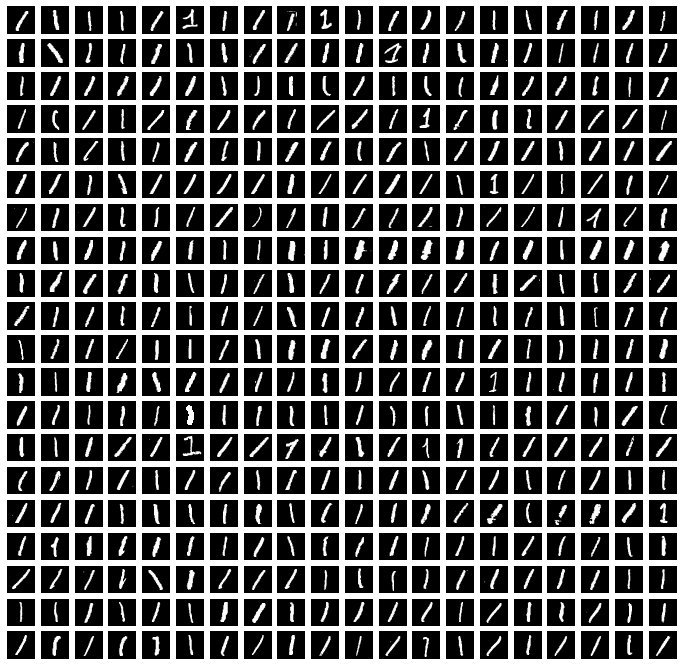

In [ ]:
# Las primeras 400's ocurencias de los dígitos del 1 al 7
import numpy as np

nrowsIm = 20
ncolsIm = 20
numIm = nrowsIm*ncolsIm

digit=1
Indexes = np.where(train_labels==digit)[0][:numIm]

plt.figure(figsize=(12,12))
for i,idx in enumerate(Indexes[:numIm]):
    plt.subplot(nrowsIm,ncolsIm,i+1)
    plt.imshow(train_images[idx], 'gray')
    plt.axis('off')
    
plt.show()

In [ ]:
# Normalizar los vectores

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
# Las etiquetas cambiar a formato categorico, a forma de variable indicadora (one hot encoding)

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

* Modelo con `sckitlearn`

In [ ]:
import time 
start_time =  time.time()
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(5, 2), random_state=1)

nn.fit(train_images, train_labels)

print("Time : {}".format(time.time() - start_time))

Time : 5.829132556915283


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


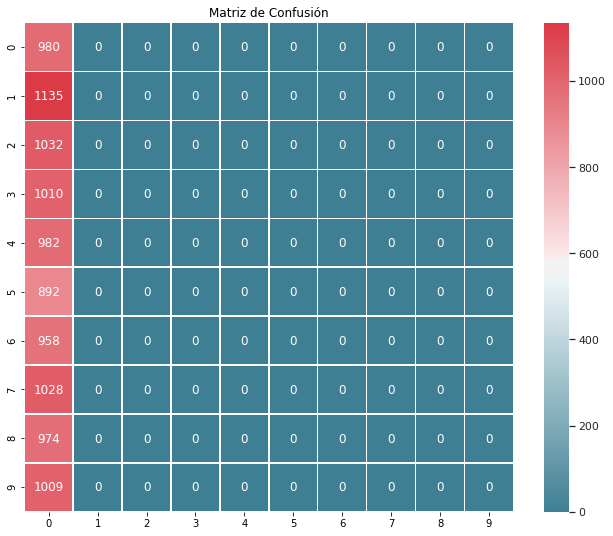

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import numpy as np

classes = nn.predict(test_images)

test_true_labels      = np.argmax(test_labels, axis=1)
test_predicted_labels = np.argmax(classes,axis=1)


C = confusion_matrix(test_true_labels, test_predicted_labels)


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')


plt.show()

* MOdelo con `tf.keras`

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Arquitectura
nn = Sequential()
nn.add(Dense(512,                   # numero de neuronas en la capa
             activation = "relu",   # función de activación
             input_shape=(28*28,))) # forma de la entrada, la otra dimensión es 
                                    # el tamaño deñ lote
nn.add(Dropout(.2))    
nn.add(Dense(10, activation = "softmax")) # capa de salida

nn.summary() # resumen de arquitectura

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile
nn.compile(optimizer='nadam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
import time
tic=time.time()

# Entrenamiento
history = nn.fit(train_images, train_labels, epochs=25, 
                 validation_split=0.2, batch_size=128)

print('Tiempo de procesamiento (secs): ', time.time()-tic)

Epoch 1/25
375/375 [==============================] - 5s 13ms/step - loss: 0.3269 - accuracy: 0.9083 - val_loss: 0.1614 - val_accuracy: 0.9553
Epoch 2/25
375/375 [==============================] - 5s 13ms/step - loss: 0.1374 - accuracy: 0.9597 - val_loss: 0.1114 - val_accuracy: 0.9663
Epoch 3/25
375/375 [==============================] - 5s 13ms/step - loss: 0.0932 - accuracy: 0.9731 - val_loss: 0.0934 - val_accuracy: 0.9729
Epoch 4/25
375/375 [==============================] - 5s 13ms/step - loss: 0.0704 - accuracy: 0.9794 - val_loss: 0.0839 - val_accuracy: 0.9743
Epoch 5/25
375/375 [==============================] - 5s 13ms/step - loss: 0.0552 - accuracy: 0.9833 - val_loss: 0.0803 - val_accuracy: 0.9763
Epoch 6/25
375/375 [==============================] - 5s 13ms/step - loss: 0.0432 - accuracy: 0.9870 - val_loss: 0.0789 - val_accuracy: 0.9759
Epoch 7/25
375/375 [==============================] - 5s 13ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0692 - val_accuracy: 0.9795

Nota: si vuelvo a dar entrenar, las epocas se acomulan, lo mejor es que si quieres ajustar de nuevo la arquitectura elimines el modelo con "del modelo_nombre"

Visualización


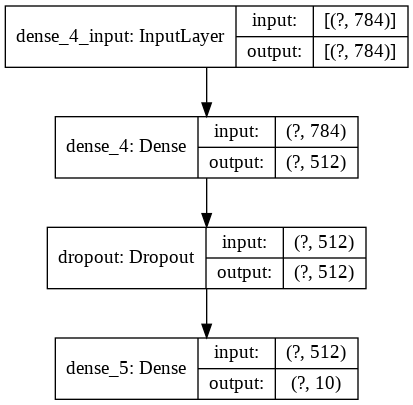

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(nn, to_file='TALLER.png',show_shapes=True, show_layer_names=True)
Image(retina=True, filename='TALLER.png')

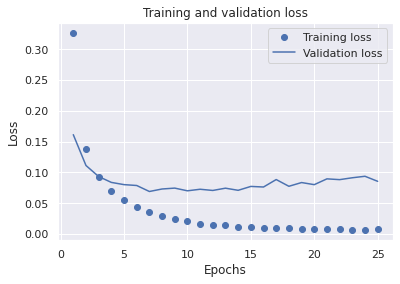

In [ ]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

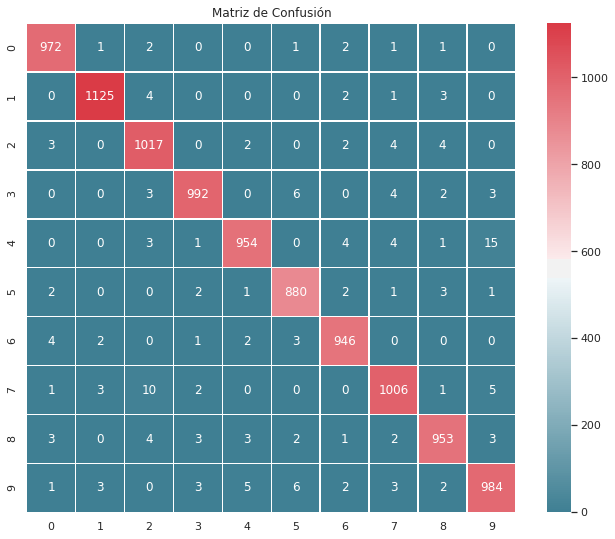

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import numpy as np

classes = nn.predict(test_images)

test_true_labels      = np.argmax(test_labels, axis=1)
test_predicted_labels = np.argmax(classes,axis=1)


C = confusion_matrix(test_true_labels, test_predicted_labels)


f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')


plt.show()

### Guardar Pesos y Modelos

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [ ]:
# Se puede guerdar el modelo y sus pesos

# Guardar los pesos
nn.save_weights('Taller')

# Crear modelo para cargar pesos
model = create_model()

# cargar los pesos
model.load_weights('Taller')

# H5 file Este archivo incluye:

# Los modelos de arquitectura
# Los valores de peso del modelo (que se aprendieron durante el entrenamiento)
# La configuración de entrenamiento del modelo (lo que pasó a 'compilar'), si corresponde
# El optimizador y su estado, si corresponde (esto le permite reiniciar el entrenamiento donde lo dejó)

model.save('Taller_model.h5')
new_model = tf.keras.models.load_model('Taller_model.h55')

# Eliminar modelos
del nn


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7fd245cdcef0> and <tensorflow.python.keras.layers.core.Dropout object at 0x7fd245cdcf60>).


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Ejemplo 2 (Tensorboard)

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
def train_model():
  
  model = create_model()
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(x=x_train, 
            y=y_train, 
            epochs=5, 
            validation_data=(x_test, y_test), 
            callbacks=[tensorboard_callback])

train_model()

In [ ]:
%tensorboard --logdir logs